In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [14]:
sigmas- means[0]

array([[[-0.6810755 , -0.75176984],
        [-0.69872366, -0.68816461]],

       [[-0.6810755 , -0.75176984],
        [-0.69872366, -0.68816461]]])

In [15]:
X.shape , sigmas.shape ,

AttributeError: 'list' object has no attribute 'shape'

In [30]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    x = -1*( d*0/5*np.log(2 * np.pi)) + 0.5*np.log(np.linalg.det(sigma))
    y = -1*0/5 *np.dot(np.dot((X-mean),np.linalg.inv(sigma)),np.dot(np.linalg.inv(sigma),(X - mean).T))
    return x + np.sum(y,axis=1)

In [31]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [32]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


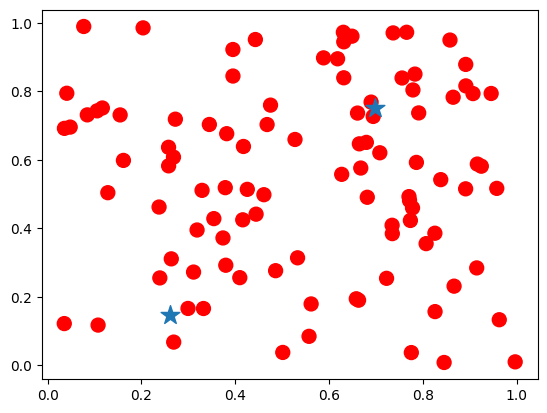

In [33]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()